In [1]:
import os 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import dataPrep as dP
import matplotlib.pyplot as plt
from keras import models,layers 
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
images,labels = dP.getData(96)
y_train = to_categorical(labels,num_classes = 20)
x_train = images/255.0
del images,labels #Free up some memory
_,x,y,z = x_train.shape
print(x_train.shape)
print(y_train.shape)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
19
(6000, 96, 96, 1)
(6000, 20)


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(128,kernel_size = 3,strides = 2,activation = 'relu',padding = 'same',input_shape = (x,y,z)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size = 3,strides = 2,padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size = 3,strides = 2,padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(20,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

Epoch 1/25
6000/6000 [==============================] - 17s 3ms/step - loss: 2.8287 - accuracy: 0.0867
Epoch 2/25
6000/6000 [==============================] - 15s 3ms/step - loss: 2.6495 - accuracy: 0.1642
Epoch 3/25
6000/6000 [==============================] - 16s 3ms/step - loss: 2.3917 - accuracy: 0.2483
Epoch 4/25
6000/6000 [==============================] - 17s 3ms/step - loss: 2.2084 - accuracy: 0.2988
Epoch 5/25
6000/6000 [==============================] - 15s 3ms/step - loss: 2.0880 - accuracy: 0.3293
Epoch 6/25
6000/6000 [==============================] - 15s 3ms/step - loss: 2.0029 - accuracy: 0.3520
Epoch 7/25
6000/6000 [==============================] - 15s 3ms/step - loss: 1.9361 - accuracy: 0.3608
Epoch 8/25
6000/6000 [==============================] - 15s 2ms/step - loss: 1.8641 - accuracy: 0.3913
Epoch 9/25
6000/6000 [==============================] - 15s 3ms/step - loss: 1.8087 - accuracy: 0.4000
Epoch 10/25
6000/6000 [==============================] - 16s 3ms/step - l

W0615 15:45:52.394304 4550444480 legend.py:1282] No handles with labels found to put in legend.


dict_keys(['loss', 'accuracy'])


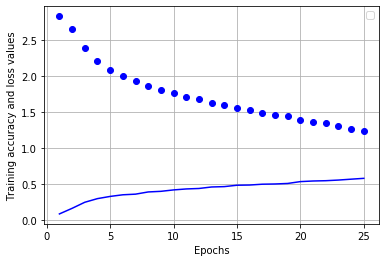

In [5]:
#Early stopping and callbacks
#Train without stopping and keras callbacks. 
history = model.fit(x_train,y_train,epochs = 25,batch_size = 64,verbose = 1)
print(history.history.keys())
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo')
plt.plot(epochs,accuracy,'b')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy and loss values')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()